## IMPORTING LIBRARIES

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.subplots import make_subplots
from plotly.offline import plot

import warnings

pd.options.display.max_rows = 1000 #handy for showing truncated results
pd.options.display.max_columns = 1000 #handy for showing truncated results
warnings.filterwarnings('ignore')

# I - LOADING DATASET

In [41]:
df = pd.read_csv('Speed+Dating+Data.csv', encoding='ISO-8859-1')

pd.set_option('display.max_columns', None) # Afficher tous les colonnes
print(f"Number of rows : {df.shape[0]} - Number of columns : {df.shape[1]}")
df.head()

Number of rows : 8378 - Number of columns : 195


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [42]:
# Showing all columns
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [43]:
df['dec']

0       1
1       1
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: dec, Length: 8378, dtype: int64

In [44]:
# Statistic desciption
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [45]:
# Number of participants/waves of dating
print(f"{df.iid.nunique()} participants")
print(f"{len(df['wave'].value_counts())} waves")

551 participants
21 waves


# II - DATA CLEANING

In [46]:
# Vérifier les valeurs manquantes dans le dataset
miss_val = df.isnull().sum()
miss_val

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

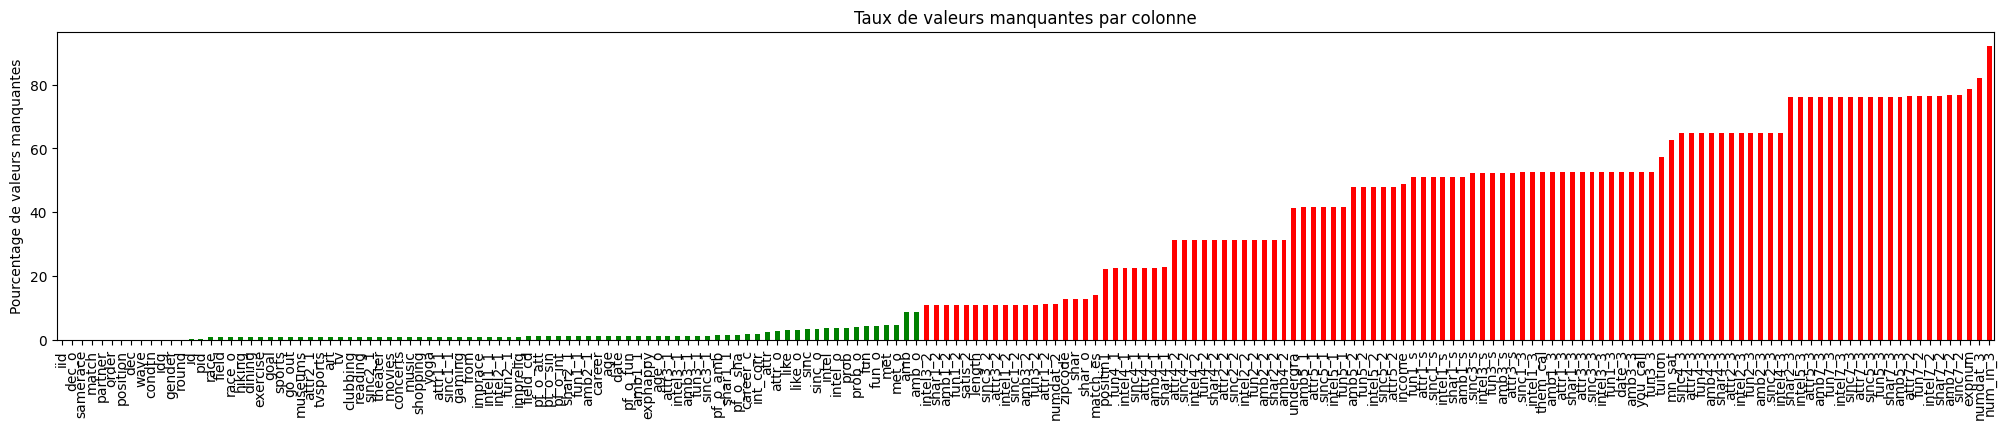

In [47]:
# Showing missing values by columns
nan_percentage = (df.isna().mean() * 100).sort_values()

fig, ax = plt.subplots(figsize=(25, 4))
colors = ['blue' if p == 10 else 'green' if p <= 10 else 'red' for p in nan_percentage]
nan_percentage.plot(kind="bar", color=colors, ax=ax)

# labels
ax.set_title("Taux de valeurs manquantes par colonne")
ax.set_ylabel("Pourcentage de valeurs manquantes")

plt.show()

Il y a un énorme manque de données dans les colonnes d'attribut ou d'auto-score, nous allons donc nous concentrer sur des données plus précises telles que l'âge, le sexe, la religion, l'éducation, etc...

Text(0.5, 1.0, 'Correlation entre les features')

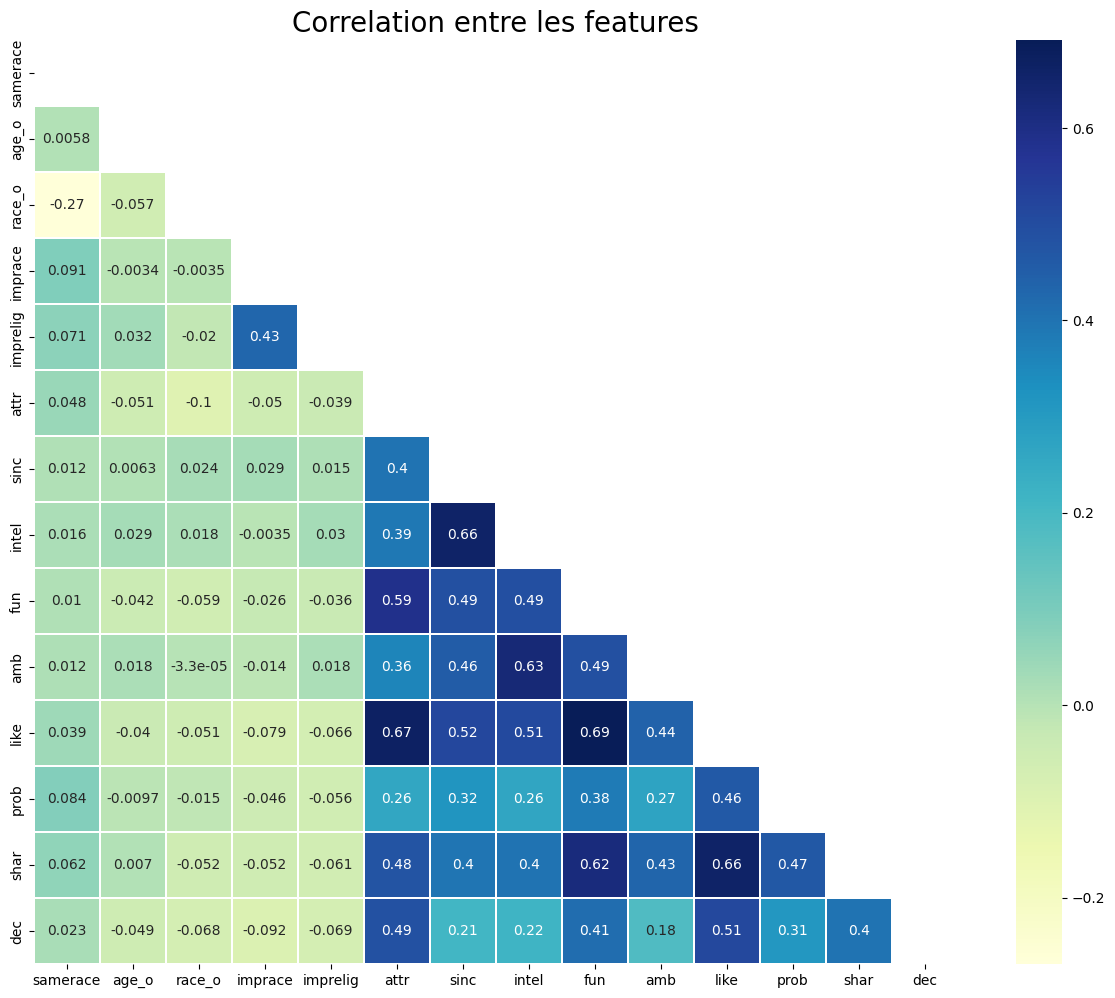

In [48]:
corr_columns = ['samerace', 'age_o', 'race_o', 'imprace', 'imprelig', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'shar', 'dec']
data_corr = df[corr_columns]

mask = np.zeros_like(data_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap (data_corr.corr(), annot=True, mask = mask,
             cmap = 'YlGnBu', linewidths=0.1, square=True)
plt.title("Correlation entre les features", fontsize=20)

On constate par cette Headmap que les attributs personnels comme le plaisir, l'attractivité ou autres sont beaucoup corrélés les uns aux autres tant disque les features comme la race, religion le sont beaucoup moins.

In [49]:
df_gender_age = df.groupby(['gender', 'age_o']).size().reset_index(name='counts')
df_gender_age = df_gender_age.sort_values(by='counts', ascending=False)
fig = px.bar(df_gender_age, x="gender", y="counts", color="age_o", 
             title="Age des participants", labels={'gender': 'Genre', 'counts': 'Nombre d individus'})
fig.show()



On constate que chez les femmes, l'âge le plus recurrent est de 27 ans tandis que chez les hommes c'est 23 ans.

In [50]:
# Let's rename few features or features's values

df_clean = df.copy()

df_clean['gender'] = df_clean.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_clean.gender)
df_clean['race'] = df_clean.race.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American',  4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(df_clean.race)
df_clean['race_o'] = df_clean.race_o.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American',  4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(df_clean.race_o)

df_clean['match'] = df_clean.match.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.match)
df_clean['dec_o'] = df_clean.dec_o.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.dec_o)
df_clean['dec'] = df_clean.dec.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.dec)

In [51]:
def rename_columns(df_clean):
    for col in df_clean.columns:
        if "attr" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("attr", "Attractive")
        if "sinc" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("sinc", "Sincere")
        if "intel" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("intel", "Intelligent")
        if "fun" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("fun", "Fun")
        if "amb" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("amb", "Ambitious")
        if "shar" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("shar", "Shared_interests")
    return df_clean.columns

df_clean.columns = rename_columns(df_clean)

In [52]:
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_Fun,pf_o_Ambitious,pf_o_sha,dec_o,Attractive_o,Sincere_o,Intelligent_o,Fun_o,Ambitious_o,Shared_interests_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1,Attractive4_1,Sincere4_1,Intelligent4_1,Fun4_1,Ambitious4_1,Shared_interests4_1,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1,Attractive3_1,Sincere3_1,Fun3_1,Intelligent3_1,Ambitious3_1,Attractive5_1,Sincere5_1,Intelligent5_1,Fun5_1,Ambitious5_1,dec,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared_interests,like,prob,met,match_es,Attractive1_s,Sincere1_s,Intelligent1_s,Fun1_s,Ambitious1_s,Shared_interests1_s,Attractive3_s,Sincere3_s,Intelligent3_s,Fun3_s,Ambitious3_s,satis_2,length,numdat_2,Attractive7_2,Sincere7_2,Intelligent7_2,Fun7_2,Ambitious7_2,Shared_interests7_2,Attractive1_2,Sincere1_2,Intelligent1_2,Fun1_2,Ambitious1_2,Shared_interests1_2,Attractive4_2,Sincere4_2,Intelligent4_2,Fun4_2,Ambitious4_2,Shared_interests4_2,Attractive2_2,Sincere2_2,Intelligent2_2,Fun2_2,Ambitious2_2,Shared_interests2_2,Attractive3_2,Sincere3_2,Intelligent3_2,Fun3_2,Ambitious3_2,Attractive5_2,Sincere5_2,Intelligent5_2,Fun5_2,Ambitious5_2,you_call,them_cal,date_3,numdat_3,num_in_3,Attractive1_3,Sincere1_3,Intelligent1_3,Fun1_3,Ambitious1_3,Shared_interests1_3,Attractive7_3,Sincere7_3,Intelligent7_3,Fun7_3,Ambitious7_3,Shared_interests7_3,Attractive4_3,Sincere4_3,Intelligent4_3,Fun4_3,Ambitious4_3,Shared_interests4_3,Attractive2_3,Sincere2_3,Intelligent2_3,Fun2_3,Ambitious2_3,Shared_interests2_3,Attractive3_3,Sincere3_3,Intelligent3_3,Fun3_3,Ambitious3_3,Attractive5_3,Sincere5_3,Intelligent5_3,Fun5_3,Ambitious5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,No,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,No,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,Yes,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.

In [53]:
print(df_clean.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_Fun', 'pf_o_Ambitious', 'pf_o_sha', 'dec_o', 'Attractive_o', 'Sincere_o', 'Intelligent_o', 'Fun_o', 'Ambitious_o', 'Shared_interests_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'Attractive1_1', 'Sincere1_1', 'Intelligent1_1', 'Fun1_1', 'Ambitious1_1', 'Shared_interests1_1', 'Attractive4_1', 'Sincere4_1', 'Intelligent4_1', 'Fun4_1', 'Ambitious4_1', 'Shared_interests4_1', 'Attractive2_1', 'Sincere2_1', 'Intelligent2_1', 'Fun2_1', 'Ambitious2_

# III - VISUALIZING AND ANALISYS

# Let's try to find the least interesting attribute for both men and women

In [54]:
# We keep only unique iids
df_clean_unique_iid = df_clean.drop_duplicates(subset='iid', keep='first')

In [55]:
attributs = ['Attractive_o', 'Sincere_o', 'Intelligent_o', 'Fun_o', 'Ambitious_o', 'Shared_interests_o']

In [56]:
# Filtrage pour obtenir uniquement les lignes où le partenaire est un homme
df_male = df_clean_unique_iid[df_clean_unique_iid['gender'] == 'Male'] 

# Calculer la moyenne pour chaque attribut
avg_attributes = df_male[attributs].mean()

# Trier par ordre croissant pour mettre les attributs les moins désirables en premier
avg_attributes = avg_attributes.sort_values()

# Préparation des données pour le graphique
data = pd.DataFrame({'Attributs': avg_attributes.index, 'Score moyen': avg_attributes.values})

# Création du graphique interactif
fig = px.bar(data, x='Attributs', y='Score moyen', color='Score moyen', labels={'Attributs': 'Attributs', 'Score moyen': 'Score moyen'}, title="Moyenne des scores des attributs pour les partenaires masculins")
fig.show()


Nous constatons que pour (ou chez) les hommes, l'attribut le plus important est l'intelligence et le moins important est les intérêts partagés.

In [57]:
# Filtrage pour obtenir uniquement les lignes où le partenaire est un homme
df_female = df_clean_unique_iid[df_clean_unique_iid['gender'] == 'Female'] 

# Calculer la moyenne pour chaque attribut
avg_attributes = df_female[attributs].mean()

# Trier par ordre croissant pour mettre les attributs les moins désirables en premier
avg_attributes = avg_attributes.sort_values()

# Préparation des données pour le graphique
data = pd.DataFrame({'Attributs': avg_attributes.index, 'Score moyen': avg_attributes.values})

# Création du graphique interactif
fig = px.bar(data, x='Attributs', y='Score moyen', color='Score moyen', labels={'Attributs': 'Attributs', 'Score moyen': 'Score moyen'}, title="Moyenne des scores des attributs pour les partenaires masculins")
fig.show()



Nous constatons que pour (ou chez) les femmes, l'attribut le plus important est la sincèrité et le moins important est les intérêts partagés.

### Première conclusion : en regardant les deux graphiques, on peut dire que pour les hommes comme pour les femmes, l'attribut le moins important est les intérêts partagés ou en commun.

## À quel point les gens pensent-ils que l'attractivité est importante dans la sélection de partenaires potentiels et. son impact réel ?

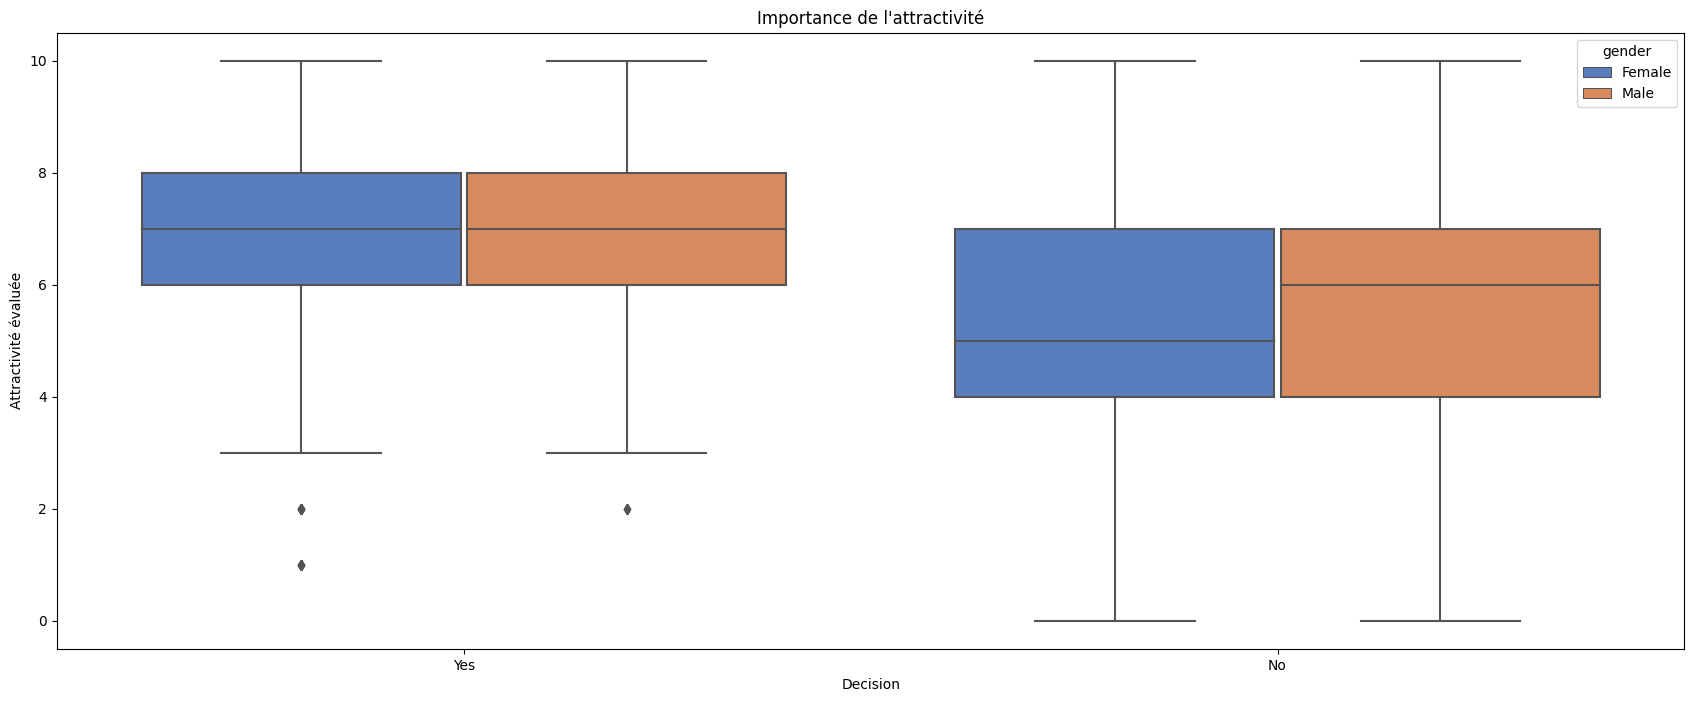

In [58]:
fig, axs = plt.subplots(figsize=(21,8))

# looking at acceptance/rejection by attractiveness attribute
sns.boxplot(x='dec', y='Attractive', data=df_clean, palette='muted',hue='gender',ax=axs
            ).set(title="Importance de l'attractivité", xlabel='Decision', ylabel='Attractivité évaluée')

plt.show()


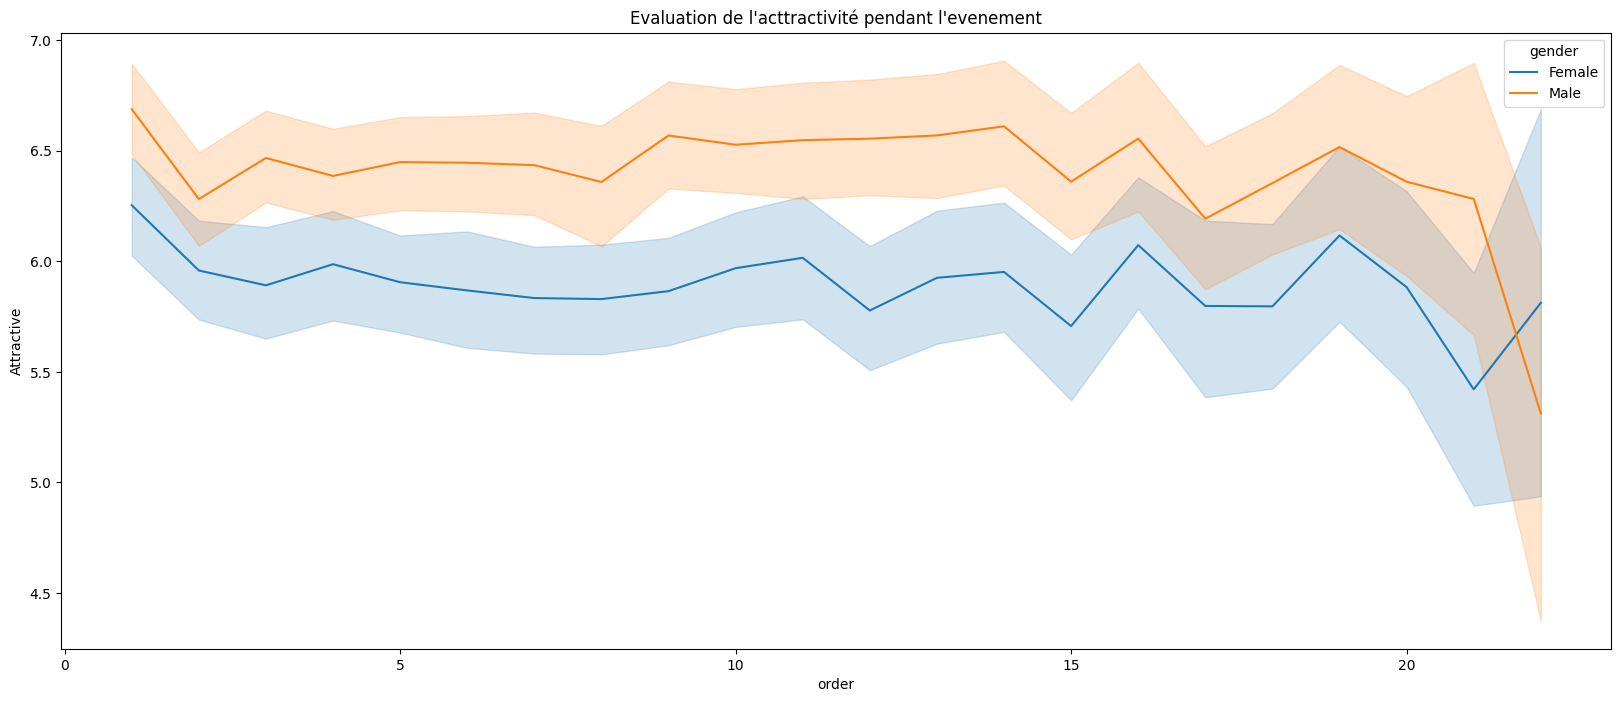

In [59]:
fig, axs = plt.subplots(figsize=(20,8))

sns.lineplot(x="order", y="Attractive", hue="gender", data=df_clean,ax=axs).set(title="Evaluation de l'attractivité pendant l'evenement")

plt.show()

Comme on peut le voir sur ces graphiques, l'attractivité a un impact sur la prise de décision, tant pour les hommes que pour les femmes. En fait, les femmes étaient plus sévères que les hommes. Le deuxième graphique montre également qu'au fur et à mesure de la soirée, les scores d'attractivité ont chuté. Était-ce dû à la lassitude ?

## Les intérêts communs sont-ils plus importants qu'une origine raciale partagée ?

In [75]:
df_match_yes = df_clean[df_clean['match'] == 'Yes']

# Création du graphique
fig = px.histogram(df_match_yes, x="match", color="samerace", 
                   title='Nombre de matchs entre personnes de même race lorsque le match est réussi',
                   labels={"match": "Match", "count": "Nombre de matchs"})

fig.show()

In [76]:
df_match_yes['Shared_interests'] = df_match_yes['Shared_interests'].apply(lambda x:"Yes" if x >= 5 else "No")

# Création du graphique
fig = px.histogram(df_match_yes, x="match", color="Shared_interests", 
                   title='Nombre de matchs entre personnes partageant les mêmes intérêts lorsque le match est réussi',
                   labels={"match": "Match", "count": "Nombre de matchs"})

fig.show()

In [79]:
fig = px.histogram(df_clean, x="race", color="match", 
                   title='Nombre de match par ethnie',
                   labels={"race": "Ethnie", "count": "Nombre de match"})

fig.show()

In [63]:
print(df_match_yes.shape)
print(df['match'].value_counts())

(1380, 195)
match
0    6998
1    1380
Name: count, dtype: int64


D'après nos graphiques et nos statistiques, nous avons eu 1 380 matchs réussis, et nous pouvons voir que sur 1 380 matchs, plus de 1 100 ont été validés en utilisant le critère d'intérêts partagés favorables, mais sur les mêmes 1 380 matchs, même pas 600 matchs en utilisant le critère d'appartenance à une même race ont été validés. Notre dernier graphique montre clairement que dans les rencontres entre personnes de même race, on a clairement eu beaucoup plus de "No match" que de "Match", on peut donc conclure que les intérêts partagés sont beaucoup plus importants que l'appartenance à la même race.

## Les gens prédisent avec précision leur propre valeur perçue sur le marché des rencontres ?

In [64]:
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_Fun,pf_o_Ambitious,pf_o_sha,dec_o,Attractive_o,Sincere_o,Intelligent_o,Fun_o,Ambitious_o,Shared_interests_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1,Attractive4_1,Sincere4_1,Intelligent4_1,Fun4_1,Ambitious4_1,Shared_interests4_1,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1,Attractive3_1,Sincere3_1,Fun3_1,Intelligent3_1,Ambitious3_1,Attractive5_1,Sincere5_1,Intelligent5_1,Fun5_1,Ambitious5_1,dec,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared_interests,like,prob,met,match_es,Attractive1_s,Sincere1_s,Intelligent1_s,Fun1_s,Ambitious1_s,Shared_interests1_s,Attractive3_s,Sincere3_s,Intelligent3_s,Fun3_s,Ambitious3_s,satis_2,length,numdat_2,Attractive7_2,Sincere7_2,Intelligent7_2,Fun7_2,Ambitious7_2,Shared_interests7_2,Attractive1_2,Sincere1_2,Intelligent1_2,Fun1_2,Ambitious1_2,Shared_interests1_2,Attractive4_2,Sincere4_2,Intelligent4_2,Fun4_2,Ambitious4_2,Shared_interests4_2,Attractive2_2,Sincere2_2,Intelligent2_2,Fun2_2,Ambitious2_2,Shared_interests2_2,Attractive3_2,Sincere3_2,Intelligent3_2,Fun3_2,Ambitious3_2,Attractive5_2,Sincere5_2,Intelligent5_2,Fun5_2,Ambitious5_2,you_call,them_cal,date_3,numdat_3,num_in_3,Attractive1_3,Sincere1_3,Intelligent1_3,Fun1_3,Ambitious1_3,Shared_interests1_3,Attractive7_3,Sincere7_3,Intelligent7_3,Fun7_3,Ambitious7_3,Shared_interests7_3,Attractive4_3,Sincere4_3,Intelligent4_3,Fun4_3,Ambitious4_3,Shared_interests4_3,Attractive2_3,Sincere2_3,Intelligent2_3,Fun2_3,Ambitious2_3,Shared_interests2_3,Attractive3_3,Sincere3_3,Intelligent3_3,Fun3_3,Ambitious3_3,Attractive5_3,Sincere5_3,Intelligent5_3,Fun5_3,Ambitious5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,No,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,No,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,Yes,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.

In [65]:
def catego_prob(score:float):
    if score < 1.0:
        return "No chance"
    elif score >= 1.0 and score < 4.0:
        return "I'm 25% sure"
    elif score >= 4.0 and score < 7.0:
        return "I'm 50% sure"
    elif score >= 7.0 and score < 10.0:
        return "I'm 75% sure"
    if score == 10.0:
        return "I'm 100% sure"
    


In [66]:
# Supprimons toutes les valeurs manquantes dans les fonctionnalités prob et prob_o 
df_clean['prob'].dropna(inplace=True)
df_clean['prob_o'].dropna(inplace=True)

# Renommons les valeurs dans les fonctionnalités prob et prob_o
df_clean['prob'] = df_clean['prob'].apply(catego_prob)
df_clean['prob_o'] = df_clean['prob_o'].apply(catego_prob)

In [67]:
df_clean['prob'].value_counts()

prob
I'm 50% sure     4137
I'm 75% sure     2031
I'm 25% sure     1664
I'm 100% sure     188
No chance          49
Name: count, dtype: int64

Text(0.5, 1.0, 'Parmi les personnes compatibles, quelle est la probabilité que les personnes pensent que leur partenaire dira « oui » pour elles ?')

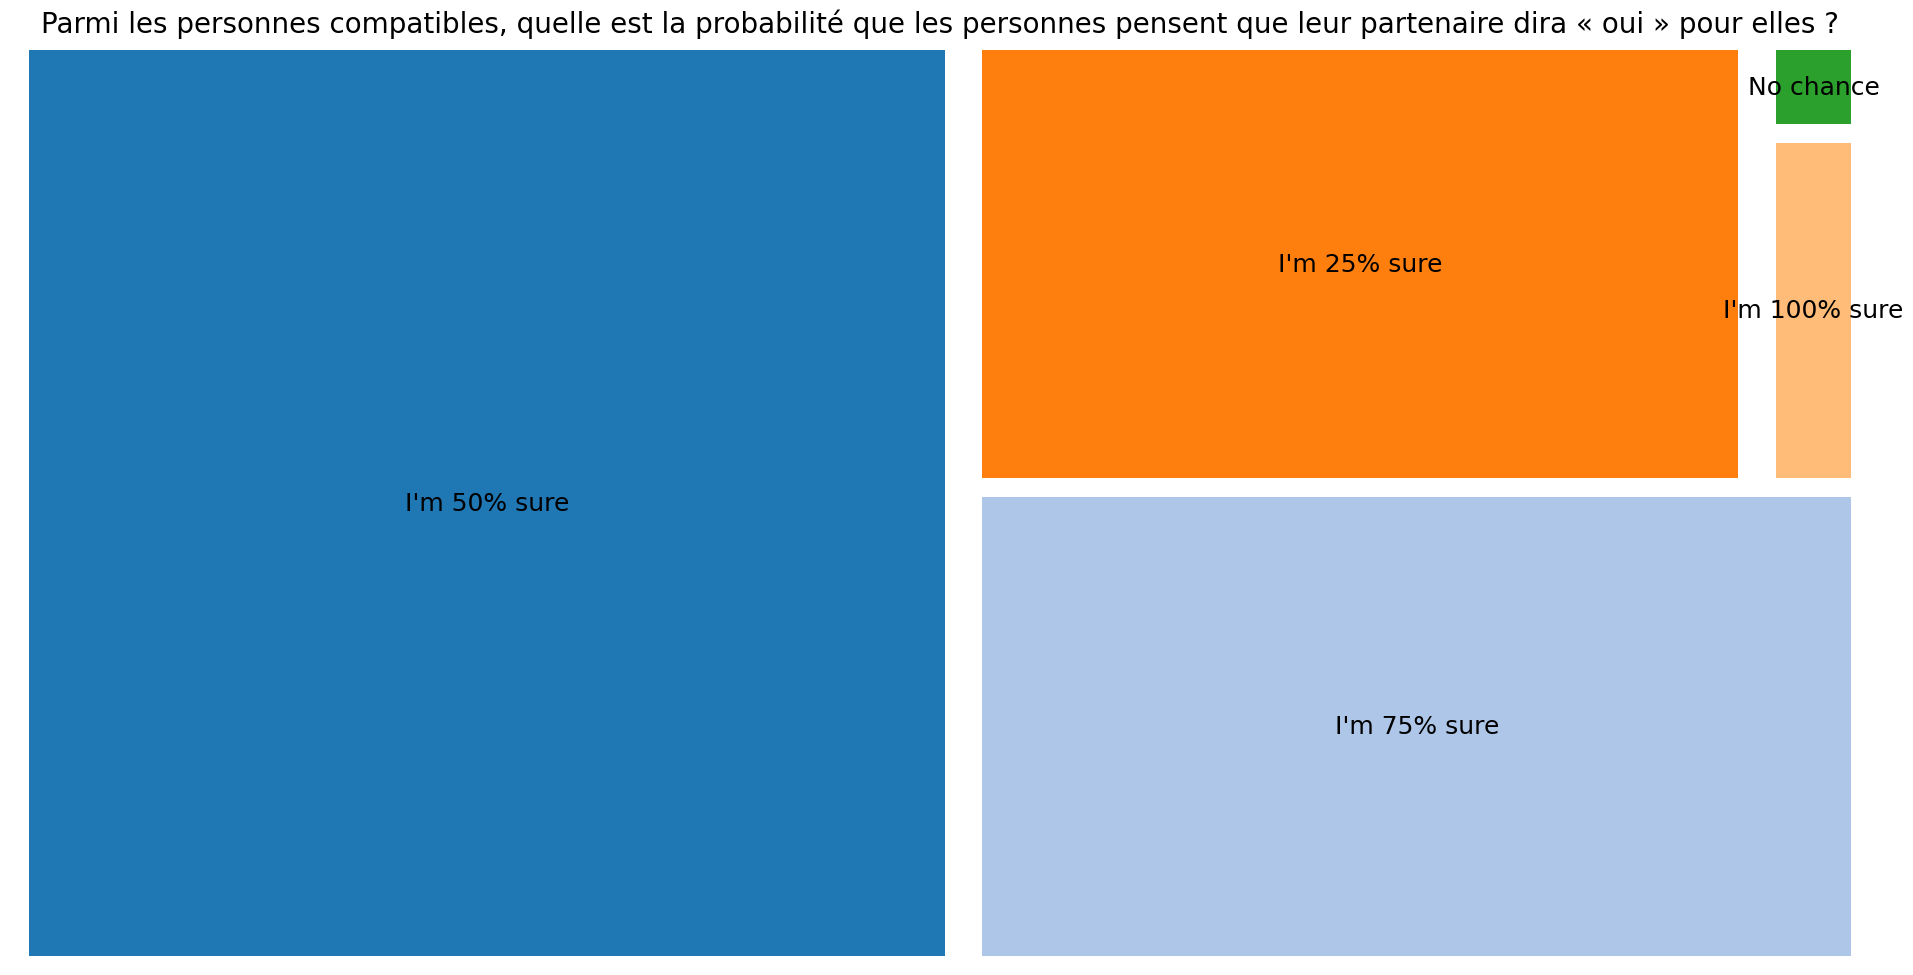

In [81]:
plt.figure(figsize=(24, 12))
# nous n'avons pas besoin des valeurs d'axe, alors supprimons-les
plt.axis("off")
axis = squarify.plot(df_clean["prob"].value_counts(),
                     label=df_clean["prob"].value_counts().index,
                     color=sns.color_palette("tab20", len(
                                            df_clean["prob"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Parmi les personnes compatibles, quelle est la probabilité que les personnes pensent que leur partenaire dira « oui » pour elles ?", fontsize=20)

In [69]:
df_match_yes['prob'] = df_match_yes['prob'].apply(catego_prob)
df_match_yes['prob_o'] = df_match_yes['prob_o'].apply(catego_prob)



In [87]:
fig = px.histogram(df_clean, x="prob", color="match",
                   title='Nombre de matchs par probabilité prédite par l\'autre participant',
                   nbins=30,
                   labels={'prob': 'Probabilité prédite par l\'autre participant', 'count': 'Nombre de matchs'})

fig.show()

In [89]:
fig = px.histogram(df_clean, x="prob_o", color="match",
                   title='Nombre de matchs par probabilité prédite par le participant',
                   nbins=30,
                   labels={'prob_o': 'Probabilité prédite par le participant', 'count': 'Nombre de matchs'})

fig.show()

In [83]:

# Création du DataFrame avec 'prob' et 'prob_o' empilés
df_stacked = df_match_yes[['prob', 'prob_o']].stack().reset_index(-1).rename(columns={'level_1': 'Variable', 0: 'Value'})

# Création du graphique interactif
fig = px.histogram(df_stacked, x='Value', color='Variable', 
                   title='Probabilité que la personne dise "oui" pour vous VS Probabilité que vous dites "oui" à la personne',
                   nbins=30,
                   labels={"Value": "Variable", "count": "Count"})

fig.show()

ON constate par ces graphiques qu'en grande partie, les probabilités prédites par les participants ont été vérifiées/confirmées chez leurs partenaires.